In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [102]:
data = pd.read_csv("glass_data.csv")
data

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [110]:
data['column_k'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: column_k, dtype: int64

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   column_a  214 non-null    int64  
 1   column_b  214 non-null    float64
 2   column_c  214 non-null    float64
 3   column_d  214 non-null    float64
 4   column_e  214 non-null    float64
 5   column_f  214 non-null    float64
 6   column_g  214 non-null    float64
 7   column_h  214 non-null    float64
 8   column_i  214 non-null    float64
 9   column_j  214 non-null    float64
 10  column_k  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [112]:
# data.replace({'Actual Construction Cost':{'low_cost':>232,'High_cost':<232}},inplace=True)

In [113]:
# for i in range(Actual Construction Cost):
#     print(i)
# #     if i >150:
# #         print('low_cost')
# #     elif 150<i>400:
# #         print('medium_cost')
# #     else:
# #         print('high_cost')

# Standardize the Variables
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
scaler = StandardScaler()

In [116]:
scaler.fit(data.drop('column_k',axis=1))


StandardScaler()

In [117]:
scaled_features = scaler.transform(data.drop('column_k',axis=1))


In [118]:
data_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_feat.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j
0,-1.723976,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-1.707788,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-1.691601,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-1.675413,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-1.659226,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


# Train Test Split

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['column_k'],test_size=0.20)

# Using KNN, We'll start with k=1.

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not.

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
knn = KNeighborsClassifier(n_neighbors=1)

In [123]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [124]:
pred = knn.predict(X_test)

# Predictions and Evaluations

Let's evaluate our KNN model!

In [125]:
from sklearn.metrics import classification_report,confusion_matrix

In [126]:
print(confusion_matrix(y_test,pred))

[[12  0  0  0  0  0]
 [ 1 14  0  3  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  1  0  0  2  0]
 [ 0  0  0  0  0  7]]


In [127]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.93      0.78      0.85        18
           3       1.00      1.00      1.00         2
           5       0.25      1.00      0.40         1
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         7

    accuracy                           0.88        43
   macro avg       0.85      0.91      0.83        43
weighted avg       0.93      0.88      0.90        43



# Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [136]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

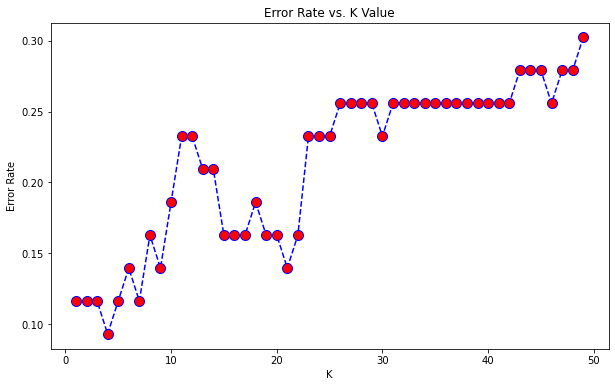

In [137]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [139]:
# NOW WITH K=22
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=21


[[11  1  0  0  0  0]
 [ 2 16  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  1  1  0  1]
 [ 0  1  0  0  0  6]]


              precision    recall  f1-score   support

           1       0.85      0.92      0.88        12
           2       0.76      0.89      0.82        18
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.86      0.86      0.86         7

    accuracy                           0.77        43
   macro avg       0.41      0.44      0.43        43
weighted avg       0.69      0.77      0.73        43



C:\Users\Abdullah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
